In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")
import os

import matplotlib
import matplotlib.pyplot as plt

from src.evaluation.metrics_from_log import TrainingLogEvaluator, LogStatisticsCalculator

In [21]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\linear_models\20200227_222138\logs.txt")

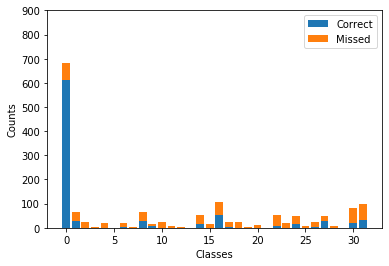

In [42]:
tle.plot_classwise_prediction_bars(save_name=r"..\logs\linear\final_test_0\linear_models\correct_counts.png", ylim=[0, 900])

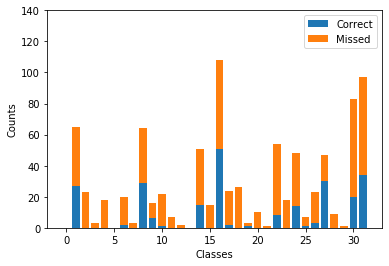

In [43]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\linear_models\correct_counts_wo_0.png", ylim=[0, 140])

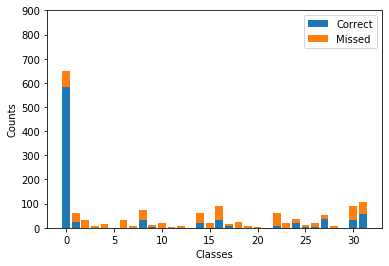

In [44]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\mixup\20200228_000949\logs.txt")
tle.plot_classwise_prediction_bars(save_name=r"..\logs\linear\final_test_0\mixup\correct_counts.png", ylim=[0, 900])

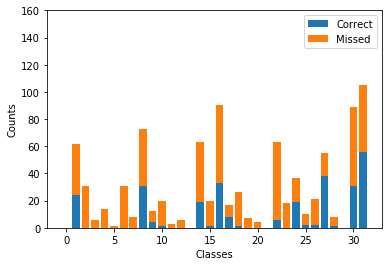

In [51]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\mixup\correct_counts_wo_0.png", ylim=[0, 160])

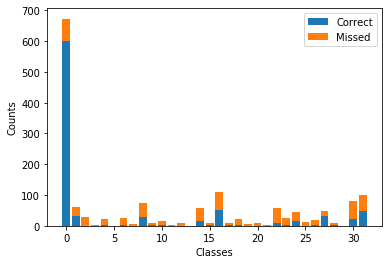

In [30]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\drug_bank\20200228_124700\logs.txt")
tle.plot_classwise_prediction_bars(save_name=r"..\logs\linear\final_test_0\drug_bank\correct_counts.png")

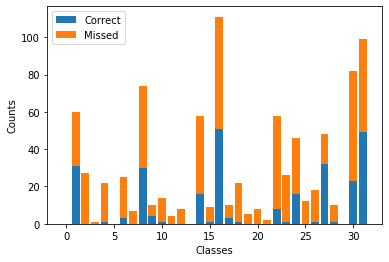

In [31]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\drug_bank\correct_counts_wo_0.png")

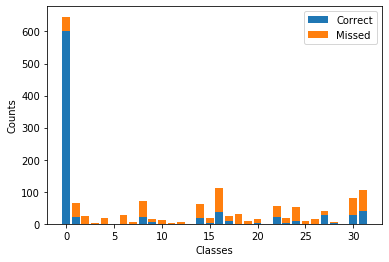

In [32]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\drugbank_mixup\20200228_154125\logs.txt")
tle.plot_classwise_prediction_bars(save_name=r"..\logs\linear\final_test_0\drugbank_mixup\correct_counts.png")

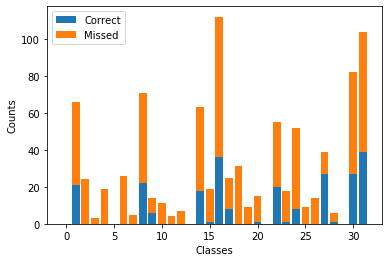

In [33]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\drugbank_mixup\correct_counts_wo_0.png")

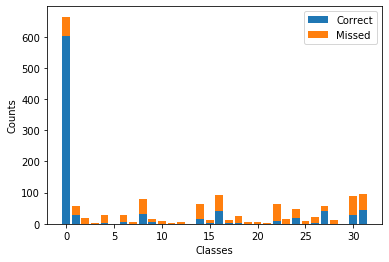

In [17]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_1\linear_models\20200223_183519\logs.txt")
tle.plot_classwise_prediction_bars()

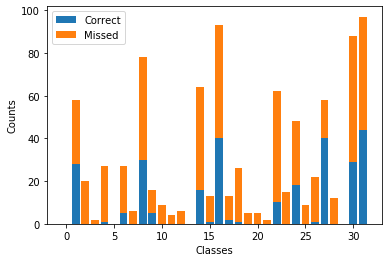

In [18]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31)

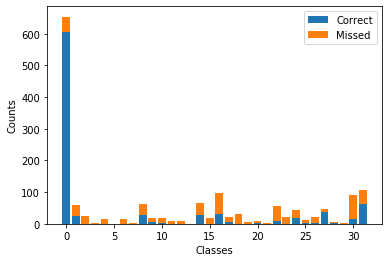

In [19]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_1\mixup\20200223_202219\logs.txt")
tle.plot_classwise_prediction_bars()

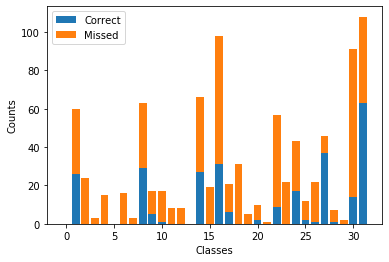

In [20]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31)

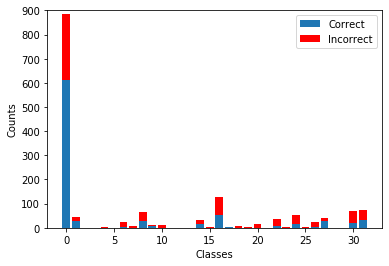

In [40]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\linear_models\20200227_222138\logs.txt")
tle.plot_classwise_correct_and_incorrect_bars(save_name=r"..\logs\linear\final_test_0\linear_models\correct_incorrect_counts.png", ylim=[0, 900])

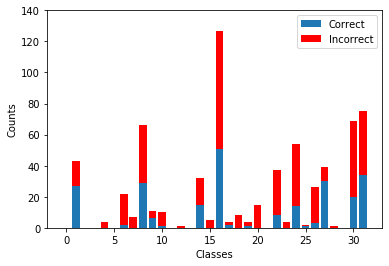

In [41]:
tle.plot_classwise_correct_and_incorrect_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\linear_models\correct_incorrect_counts_wo_0.png", ylim=[0, 140])

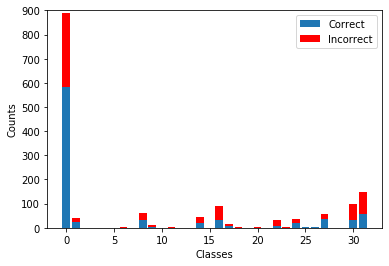

In [46]:
tle = TrainingLogEvaluator(r"..\logs\linear\final_test_0\mixup\20200228_000949\logs.txt")
tle.plot_classwise_correct_and_incorrect_bars(save_name=r"..\logs\linear\final_test_0\mixup\correct_incorrect_counts.png", ylim=[0, 900])

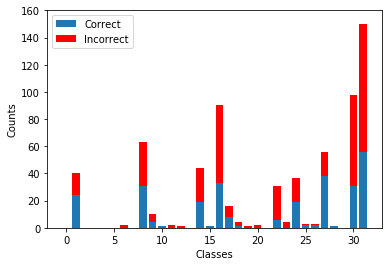

In [50]:
tle.plot_classwise_correct_and_incorrect_bars(mask=[0]+[1]*31, save_name=r"..\logs\linear\final_test_0\mixup\correct_incorrect_counts_wo_0.png", ylim=[0, 160])

In [3]:
def analyze(path):   
    tles = list()
    training_results = os.scandir(path)
    for method in training_results:
        if method.name == "convention":
            continue
        method_tles = [method.path, []]
        for experiment in os.scandir(method.path):
            if experiment.is_dir():
                method_tles[1].append(TrainingLogEvaluator(os.path.join(experiment.path, "logs.txt")))
        tles.append(method_tles)
    for methods in tles:
        lsc = LogStatisticsCalculator(methods[1], os.path.join(methods[0], "statistics.log"), mode="w")
        print(methods[0])
        lsc.statistics_str()

In [4]:
path = "../logs/linear/final_test_0"

In [5]:
analyze(path)

../logs/linear/final_test_0\drugbank_mixup
Accuracy	Precision	Recall	F1
56.33 ± 1.36	0.58 ± 0.06	0.77 ± 0.02	0.66 ± 0.03	
../logs/linear/final_test_0\drug_bank
Accuracy	Precision	Recall	F1
57.12 ± 0.88	0.63 ± 0.02	0.77 ± 0.01	0.69 ± 0.01	
../logs/linear/final_test_0\linear_models
Accuracy	Precision	Recall	F1
56.84 ± 0.57	0.64 ± 0.03	0.76 ± 0.02	0.69 ± 0.01	
../logs/linear/final_test_0\mixup
Accuracy	Precision	Recall	F1
56.40 ± 1.50	0.55 ± 0.06	0.78 ± 0.02	0.64 ± 0.04	


In [7]:
path = "../logs/linear/balanced"
tles = list()
for experiment in os.scandir(path):
    if experiment.is_dir():
        tles.append(TrainingLogEvaluator(os.path.join(experiment.path, "logs.txt")))

lsc = LogStatisticsCalculator(tles, os.path.join(path, "statistics.log"), mode="w")
lsc.statistics_str()

Accuracy	Precision	Recall	F1
56.60 ± 1.08	0.65 ± 0.02	0.76 ± 0.01	0.70 ± 0.01	


In [25]:
for methods in tles:
    print(methods[0])
    for method in methods[1]:
        print(method.get_best_acc())

../logs/linear/final_test_0\drugbank_mixup
{'Linear_S': 0.53582954, 'Linear_M': 0.54099417, 'Linear_L': 0.539703}
{'Linear_S': 0.5584248, 'Linear_M': 0.5571336, 'Linear_L': 0.5610071}
{'Linear_S': 0.55648804, 'Linear_M': 0.5668173, 'Linear_L': 0.5629438}
{'Linear_S': 0.5629438, 'Linear_M': 0.5726275, 'Linear_L': 0.57327306}
{'Linear_S': 0.568754, 'Linear_M': 0.5745642, 'Linear_L': 0.57327306}
../logs/linear/final_test_0\drug_bank
{'Linear_S': 0.5693996, 'Linear_M': 0.5726275, 'Linear_L': 0.56488055}
{'Linear_S': 0.5551969, 'Linear_M': 0.5603615, 'Linear_L': 0.55326015}
{'Linear_S': 0.5700452, 'Linear_M': 0.5655261, 'Linear_L': 0.5719819}
{'Linear_S': 0.5597159, 'Linear_M': 0.5668173, 'Linear_L': 0.5629438}
{'Linear_S': 0.5842479, 'Linear_M': 0.58102, 'Linear_L': 0.5752098}
../logs/linear/final_test_0\linear_models
{'Linear_S': 0.57327306, 'Linear_M': 0.5629438, 'Linear_L': 0.55326015}
{'Linear_S': 0.5629438, 'Linear_M': 0.56165266, 'Linear_L': 0.55326015}
{'Linear_S': 0.5629438, 'Linea

In [15]:
tles_2 = list()
training_results = os.scandir("../logs/linear/final_test_1")
for method in training_results:
    if method.name == "convention":
        continue
    method_tles = [method.path, []]
    for experiment in os.scandir(method.path):
        if experiment.is_dir():
            method_tles[1].append(TrainingLogEvaluator(os.path.join(experiment.path, "logs.txt")))
    tles_2.append(method_tles)

In [16]:
for methods in tles_2:
    lsc = LogStatisticsCalculator(methods[1], os.path.join(methods[0], "statistics.log"), mode="w")
    print(methods[0])
    lsc.statistics_str()

../logs/linear/final_test_1\drugbank_mixup
Accuracy	Precision	Recall	F1
55.75 ± 0.19	0.58 ± 0.02	0.75 ± 0.01	0.66 ± 0.01	
../logs/linear/final_test_1\drug_bank
Accuracy	Precision	Recall	F1
55.95 ± 1.11	0.63 ± 0.04	0.78 ± 0.02	0.70 ± 0.02	
../logs/linear/final_test_1\linear_models
Accuracy	Precision	Recall	F1
56.11 ± 1.63	0.64 ± 0.01	0.76 ± 0.02	0.69 ± 0.01	
../logs/linear/final_test_1\mixup
Accuracy	Precision	Recall	F1
56.63 ± 0.49	0.55 ± 0.02	0.77 ± 0.02	0.64 ± 0.02	


In [122]:
path = r"..\logs\full_download_from_DGX\balance\20200302_071550"
tle = TrainingLogEvaluator(os.path.join(path, "logs.txt"))

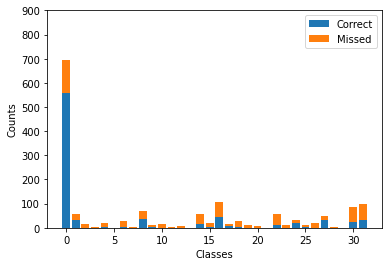

In [123]:
tle.plot_classwise_prediction_bars(save_name=os.path.join(path, "correct_counts.png"), ylim=[0, 900])

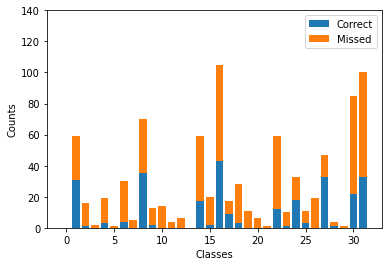

In [124]:
tle.plot_classwise_prediction_bars(mask=[0]+[1]*31, save_name=os.path.join(path, "correct_counts_wo_0.png"), ylim=[0, 140])

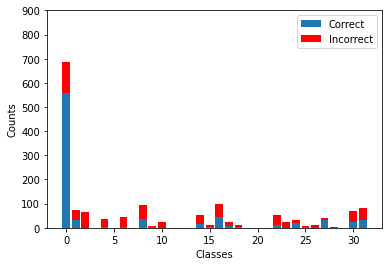

In [125]:
tle.plot_classwise_correct_and_incorrect_bars(
    save_name=os.path.join(path, "correct_incorrect_counts.png"), ylim=[0, 900])

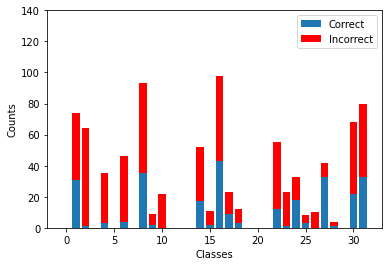

In [126]:
tle.plot_classwise_correct_and_incorrect_bars(mask=[0]+[1]*31, save_name=os.path.join(path,"correct_incorrect_counts_wo_0.png"), ylim=[0, 140])